# Mannkendall 추세분석 툴
#### 라이브러리 설치 필요시 앞쪽의 ''#' 제거후 사용
#### 파일명을 Test_data로 바꾸고 같은 폴더에 넣어둘것
#### index값 (Excel A1칸)의 명을 'Date'로 수정필요 and csv확장자명 파일만 사용

In [1]:
# pip install pymannkendall # mk분석 패키지
# pip intall matplotlib # 시각화 패키지

In [2]:
#패키지 임포트
import numpy as np
import pymannkendall as mk # mk분석 패키지
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
%matplotlib inline
import matplotlib.font_manager as fm #한글폰트 패키지
# font settong
plt.rcParams['font.family'] = 'HCR Batang'#함초롱바탕
import os #경로 설정시 필요한 패키지
# plt box setting
from matplotlib.offsetbox import AnchoredText 
import scipy.stats as stats
## encoding으로 오류뜰시 euc-kr로 변경해보고 다시 시도
df = pd.read_csv('%s/Test_data.csv'%(os.getcwd()),
                 parse_dates = ['Date'], index_col = 'Date', encoding='utf-8')

## Original Mannkendall Test

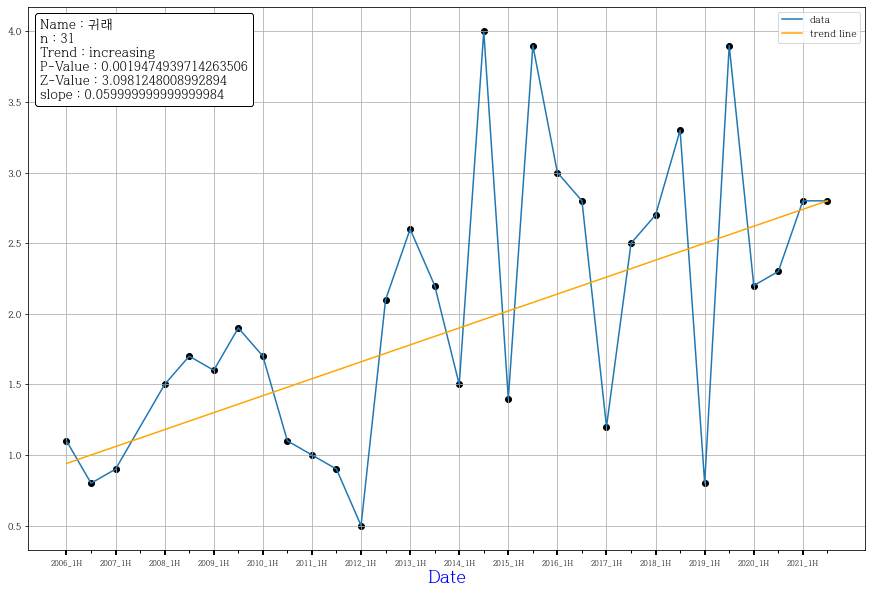

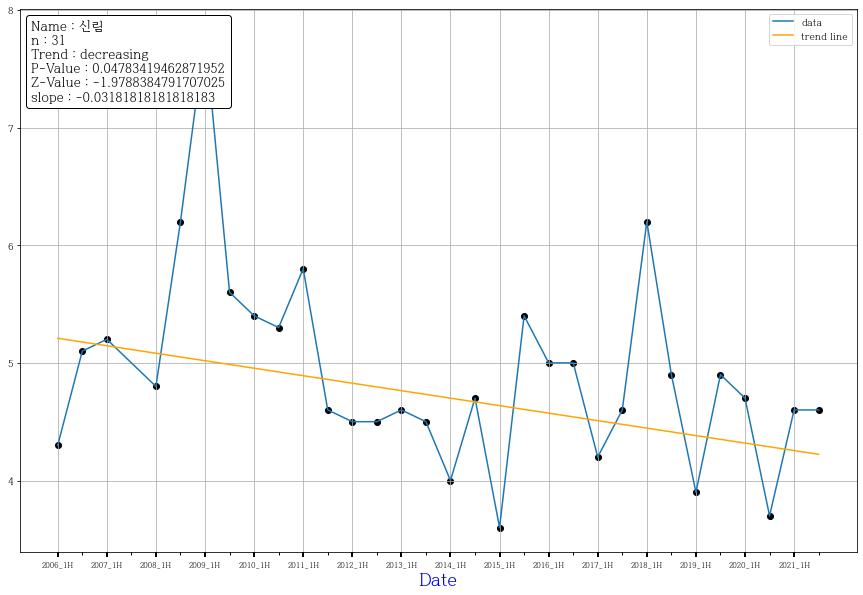

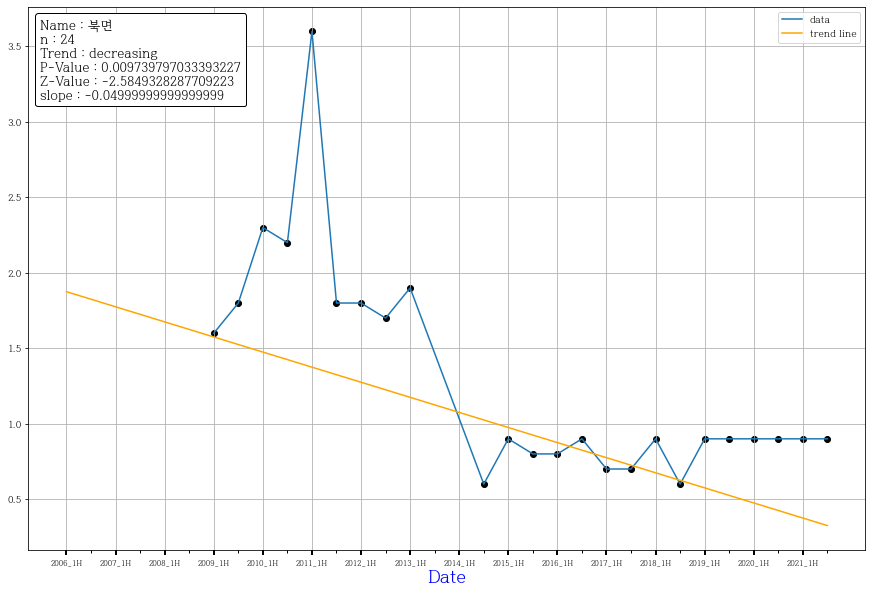

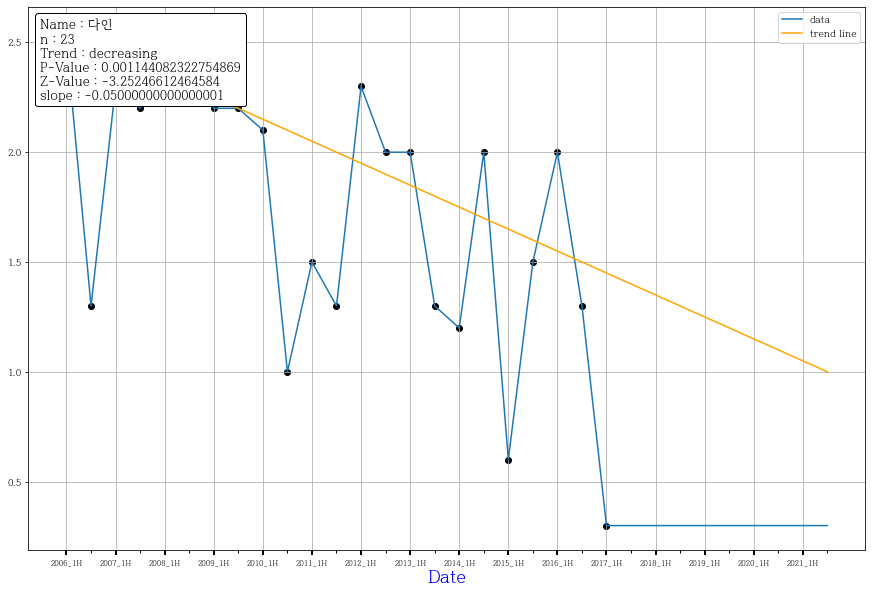

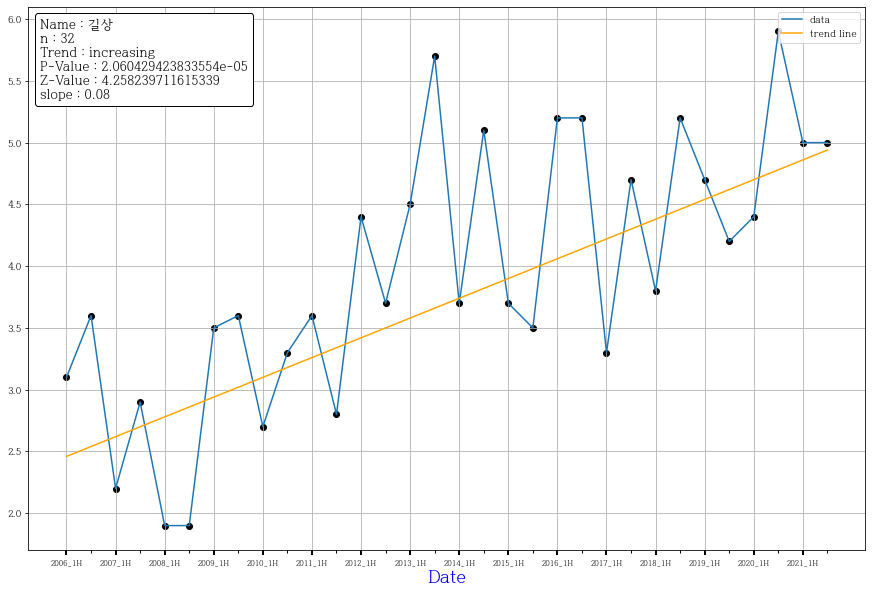

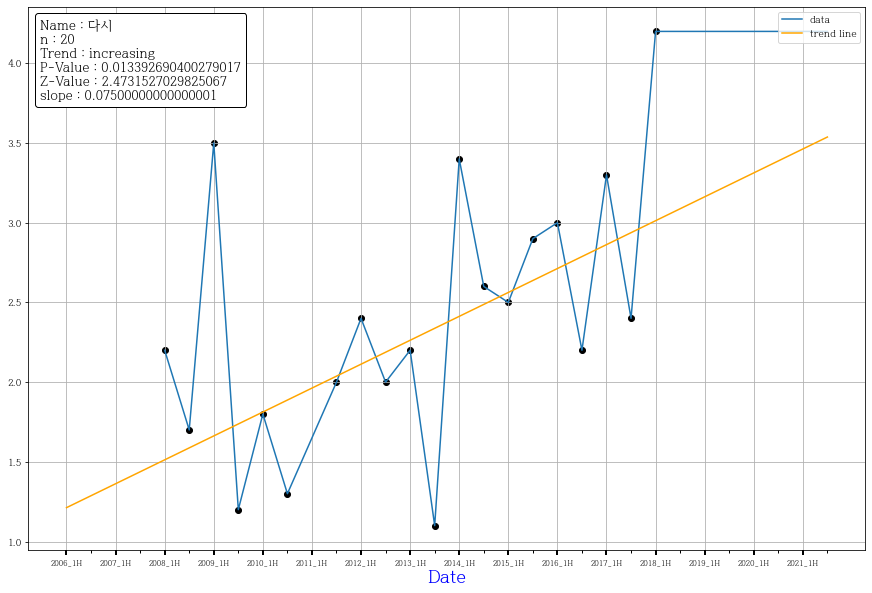

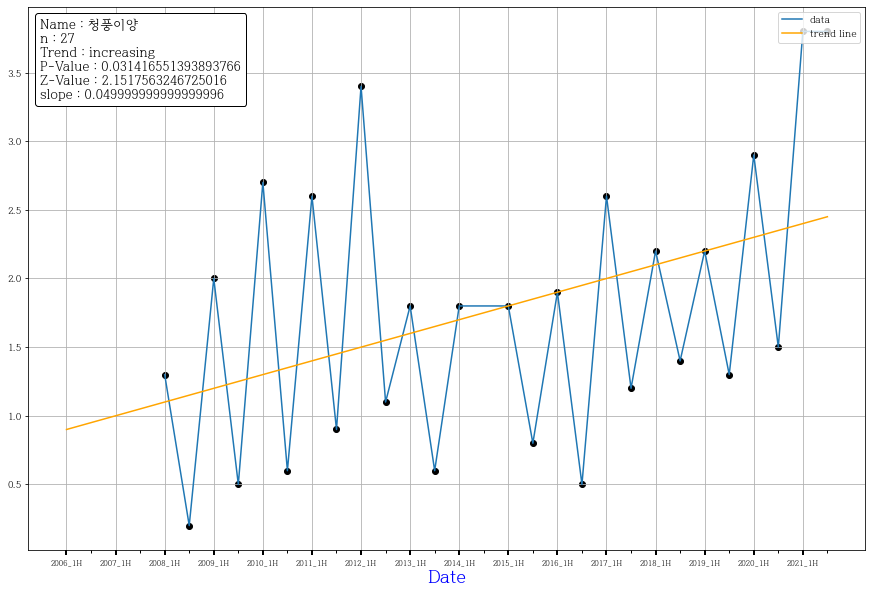

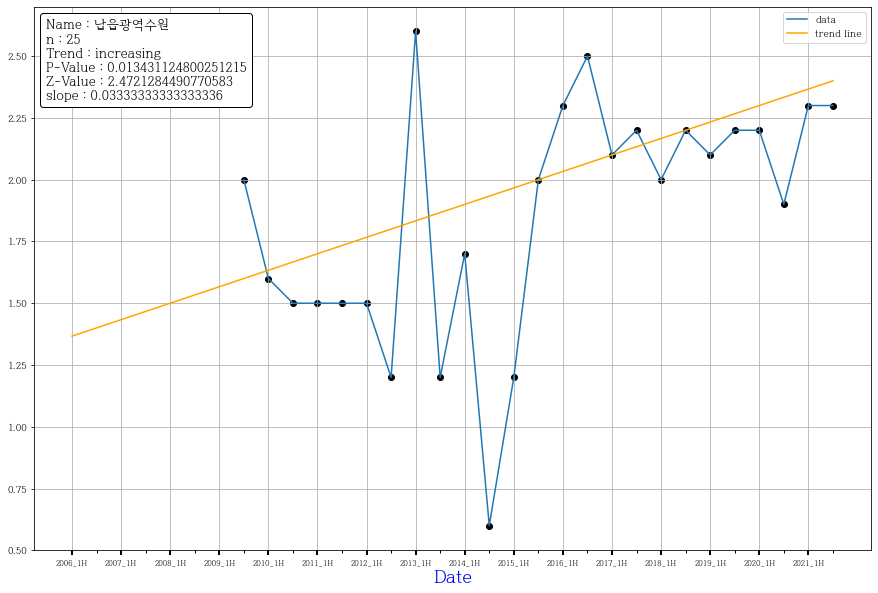

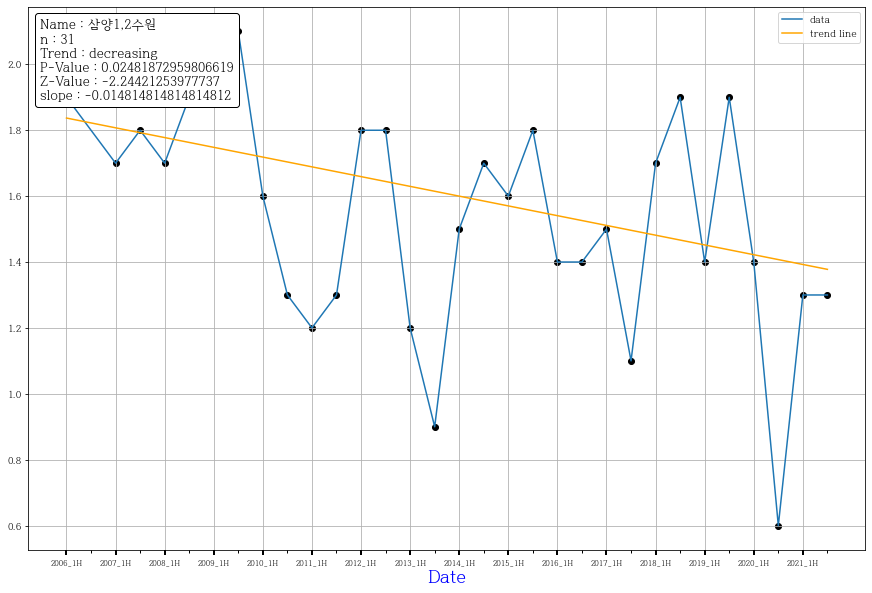

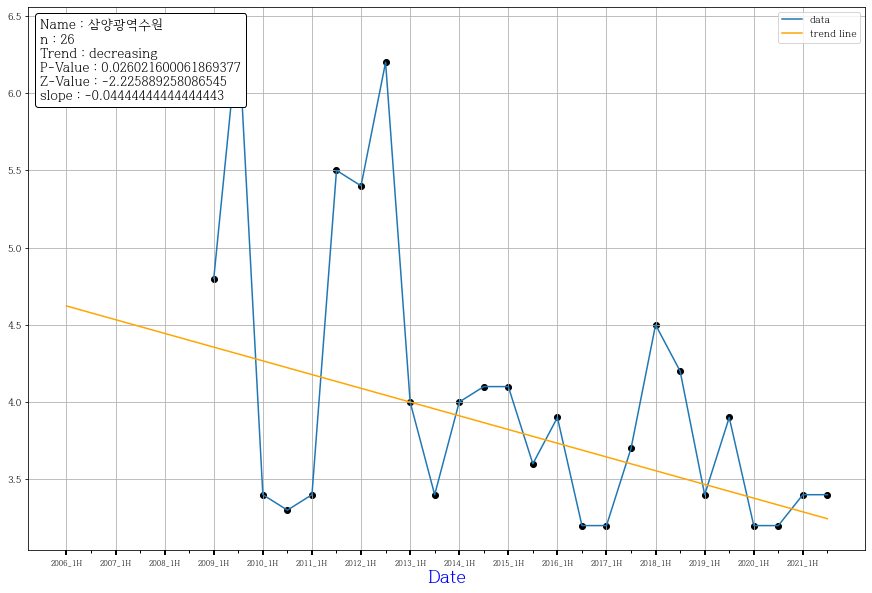

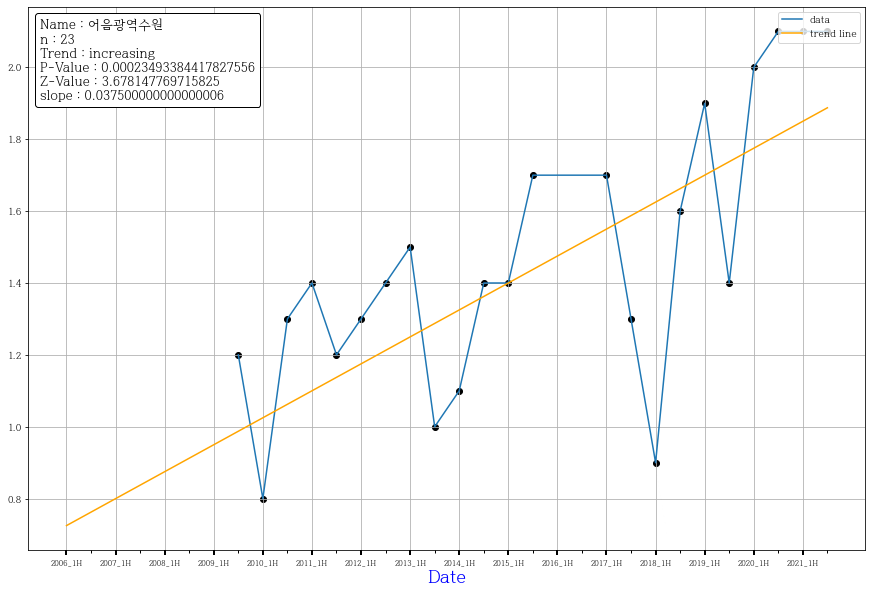

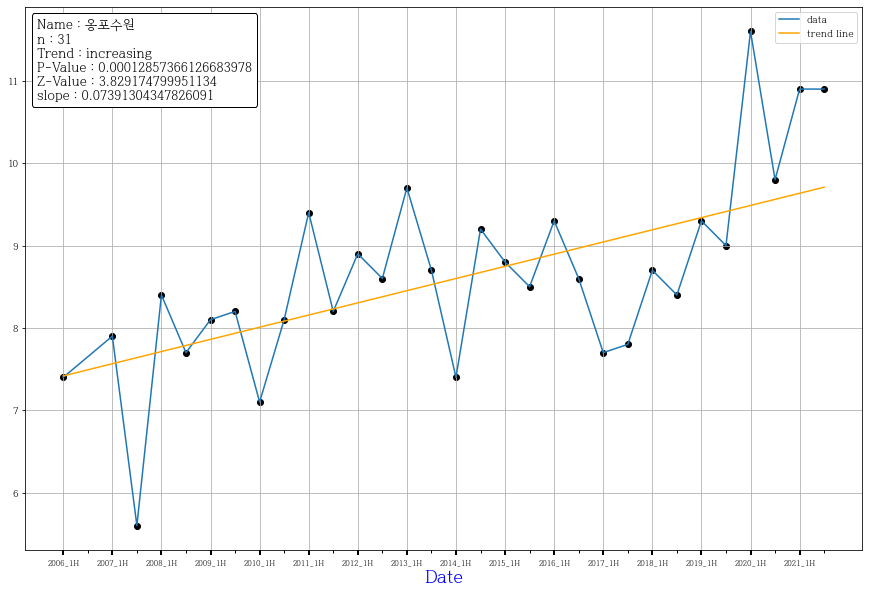

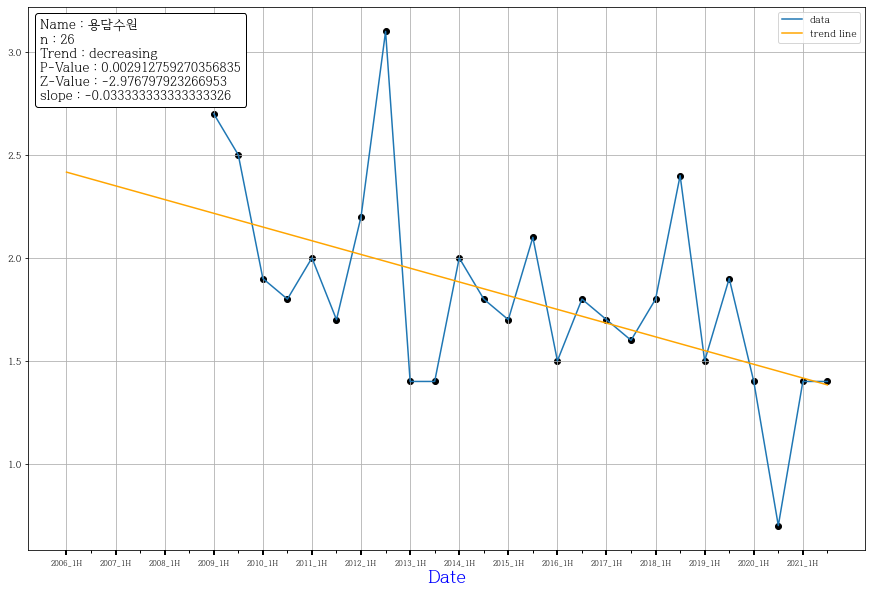

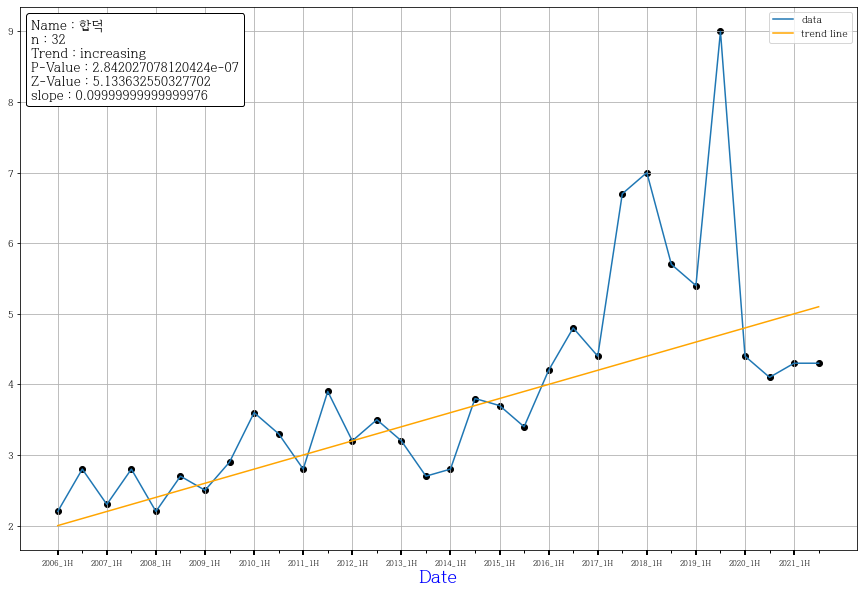

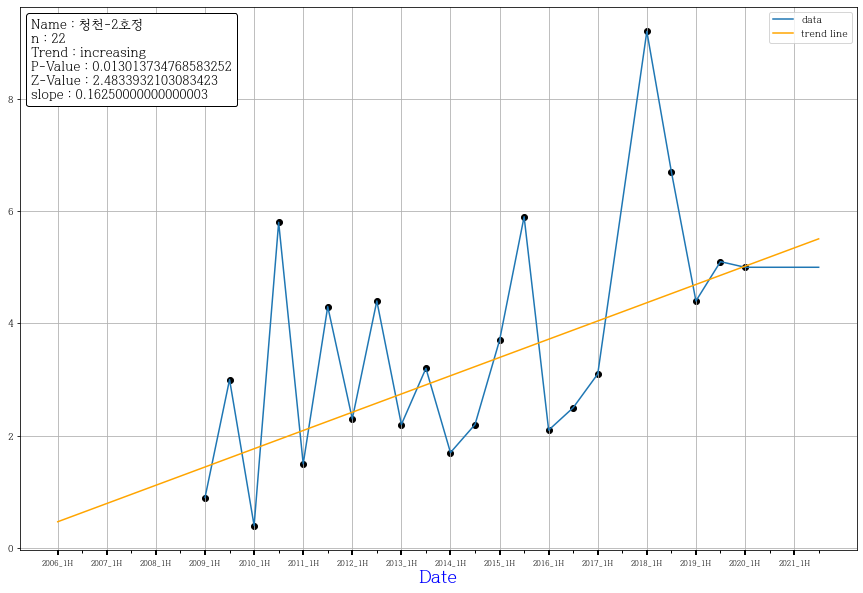

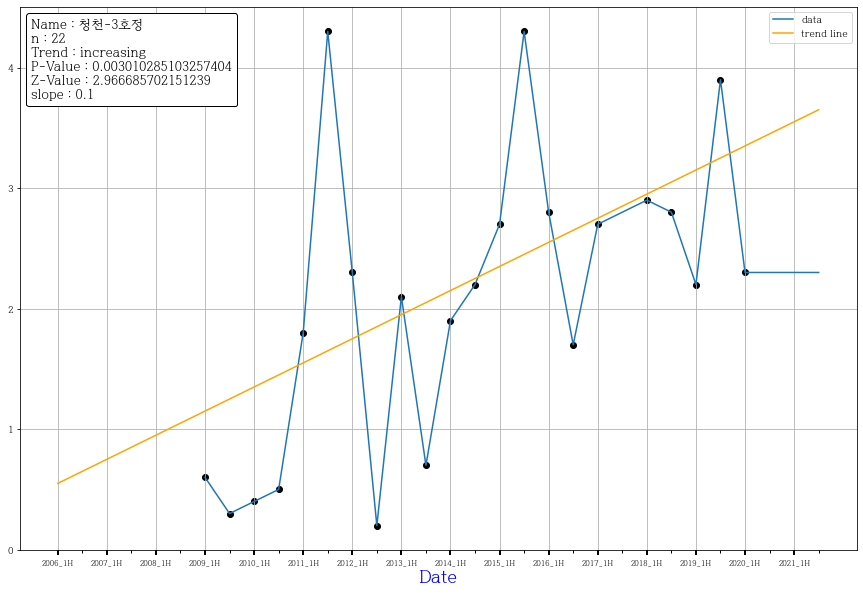

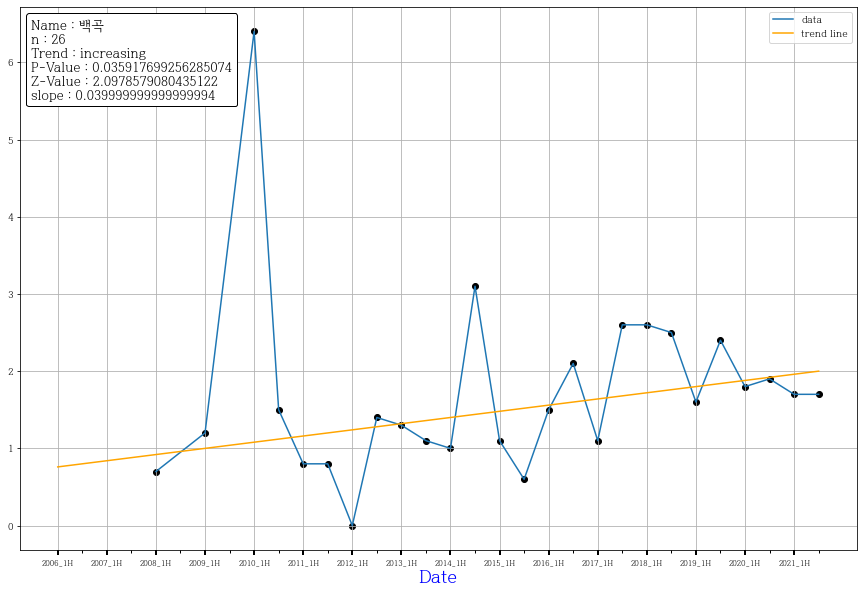

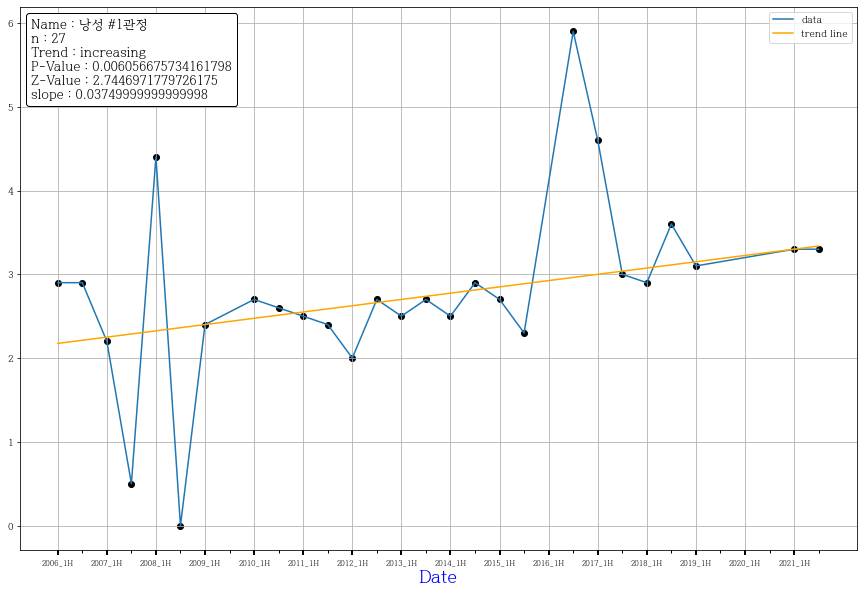

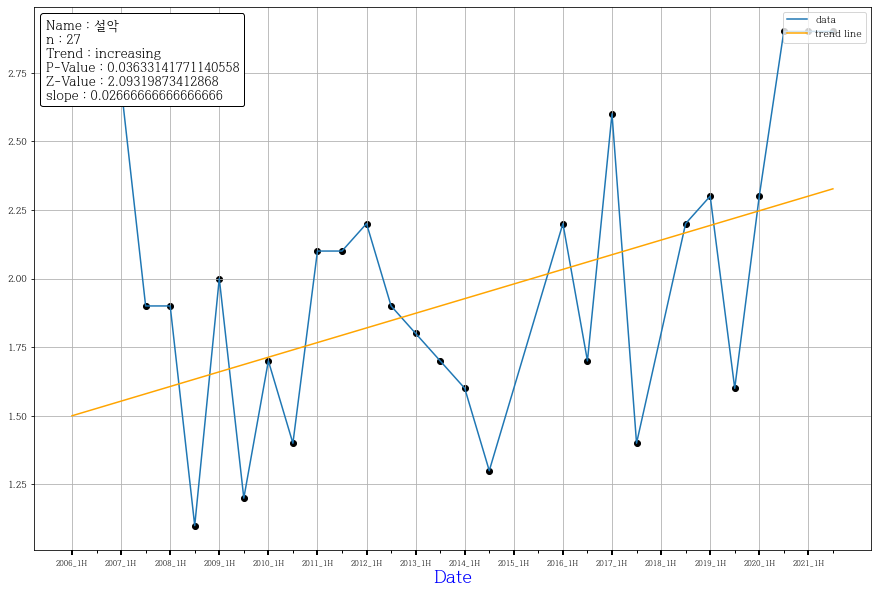

In [3]:
# 데이터 축적시킬 데이터프레임 생성 및 초기화
total_data = pd.DataFrame({'관정명' : [None],
                    'Trend' : [None],
                    'Test P' : [None],
                    'Test Z' : [None],
                    'Slope' : [None]})

#반복문 시행 -> 분석데이터 자료 축적 or 그래프 추출
##파일 양식만 맞으면 수정해서 사용가능

#첫번쨰 열부터 계산 (DataFrame 순서 0 ~)
for i in range(0, len(df.columns)):
    #데이터 분석
    df_filter = df.iloc[:, i]
    N_value = df_filter.count()
    df_filter_null = df_filter.interpolate() # 결측값 보간하기
    res = mk.original_test(df_filter, alpha = 0.05)
    # alpha값 : 원하는 범위의 p-value 선택 (Defult = 0.05)
    
    #데이터 축적
    addtive_data = pd.DataFrame({'관정명' : [df_filter.name],
                    'Trend' : [res.trend],
                    'Test P' : [res.p],
                    'Test Z' : [res.z],
                    'Slope' : [res.slope]})
    total_data = total_data.append(addtive_data, ignore_index = True)
    
    #시각화 작업
    ## if문으로 분석된 res값의 h값이 True => 그래프 생성, res값의 h값이 False => 다음 행으로 넘어감
    if res.h == True :
        #Original Mannkendall Test
        fig, ax = plt.subplots(figsize = (15,10))
        trend_line = np.arange(len(df_filter)) * res.slope + res.intercept
    
        # 그래프내의 데이터 설명
        at = AnchoredText(
        "Name : %s \nn : %d\nTrend : %s\nP-Value : %s\nZ-Value : %s\nslope : %s"%(df_filter.name,N_value,res.trend,res.p,res.z,res.slope), 
        prop=dict(size=13), loc='upper left')
        at.patch.set_boxstyle("round,pad=0., rounding_size = 0.2")
        ax.add_artist(at)
        
        #그래프 눈금(Ticks)처리
        major_xticks = [i for i in range(0, len(df_filter.index), 2)] #Main Ticks
        minor_xticks = [i for i in range(0, len(df_filter.index))] #sub ticks
        ax.set_xticks(major_xticks)
        ax.set_xticks(minor_xticks, minor=True) 
        #눈금 속성 처리
        ax.tick_params(axis='x',
                      labelsize = 8,
                      length = 5,
                      width = 2)
                      #rotation=30 => 글씨 회전
        ax.tick_params(axis='x',
                      which = 'minor',
                      length=3,
                      width=1
                      )
        #그래프 시각화
        ax.grid() #격자선
        ax.scatter(df_filter.index, df_filter, color = 'black') #점표현
        ax.plot(df_filter_null) #선표현 (결측값 보간 데이터)
        ax.plot(df_filter.index, trend_line, color = 'orange') #추세선 표현
        ax.set_xlabel('Date', fontsize=18, color = 'blue') # x축 그래프 이름
        ax.legend(['data', 'trend line'], loc='upper right')
        #사진 자동 저장
        fig.savefig('[original]%s.png'%(df_filter.name), dpi=150, facecolor='#eeeeee', bbox_inches='tight')

        
#분석 데이터 csv파일로 저장
total_data=total_data.drop(0) # 데이터프레임 생성시 만들어놓은 첫번째행 제거
total_data.to_csv('%s/[original]추세분석 결과.csv'%(os.getcwd()),
                 encoding = 'euc-kr')

# Seasonal Mannkendall Test (계절성 처리)

Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 남원정1
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 외도(D-239)
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 근남취수장1
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 근남취수장2
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 통합
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 구좌정수장 감시공
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 구좌지구1호공
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 서광지구1호공
Division by zero, please check the data before apply seasonal_test function 
 Error Data Name : 서광지구2호공
Division by zero, please check the data before apply seasonal_test fun

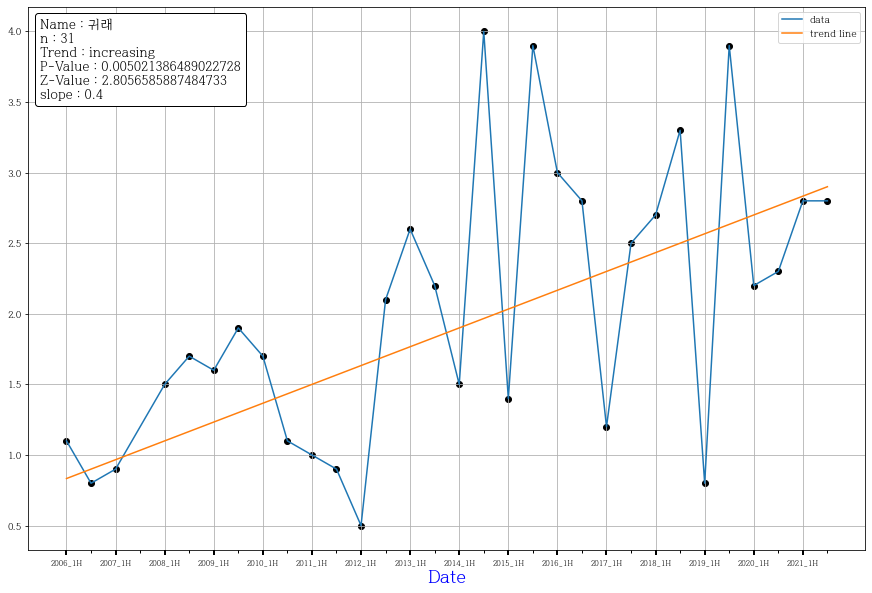

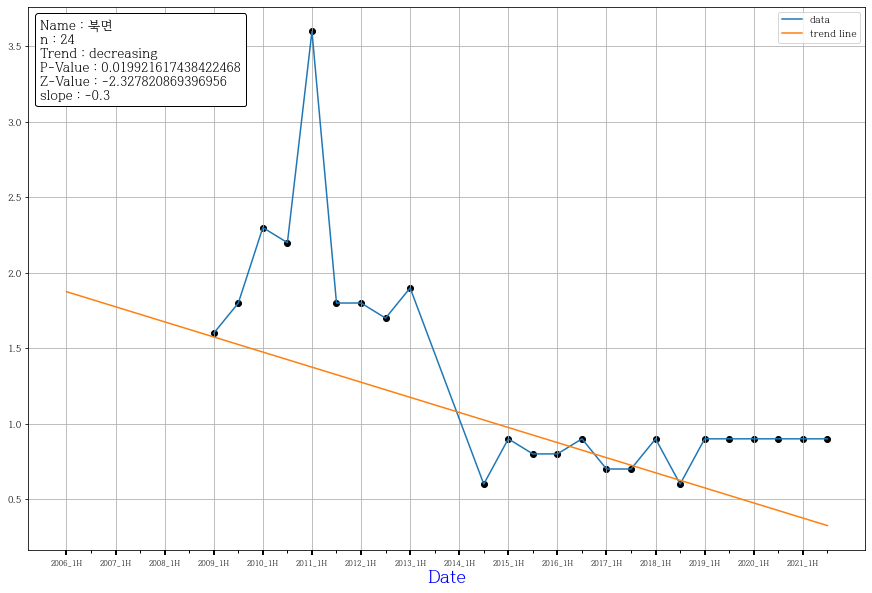

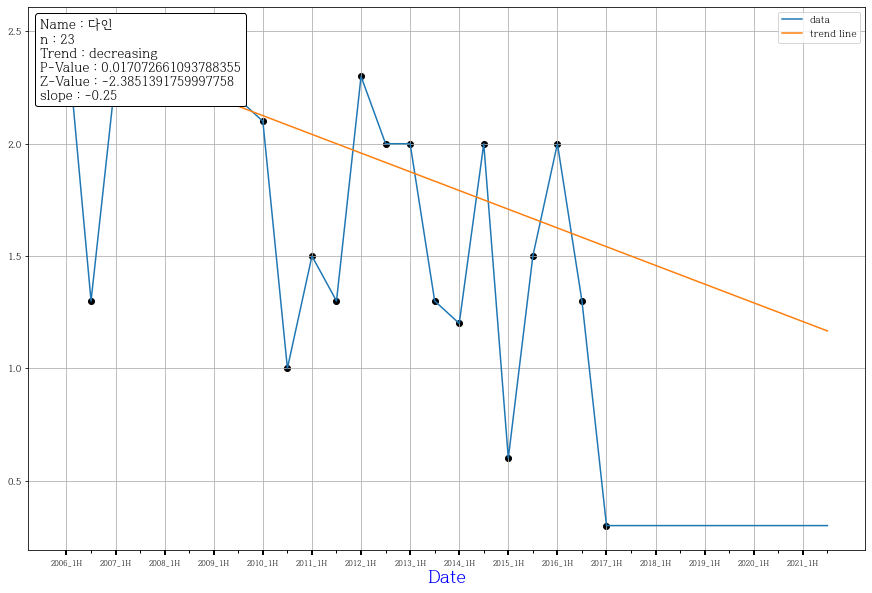

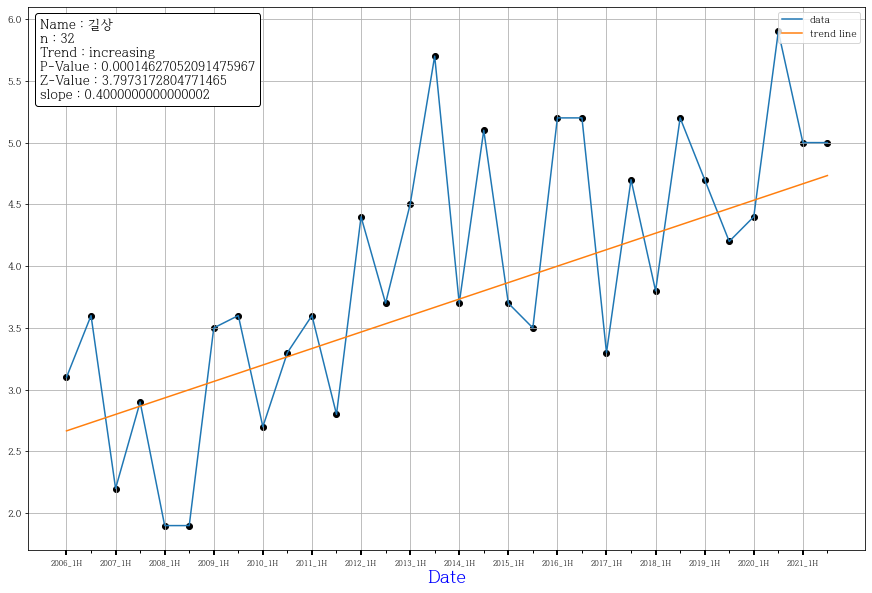

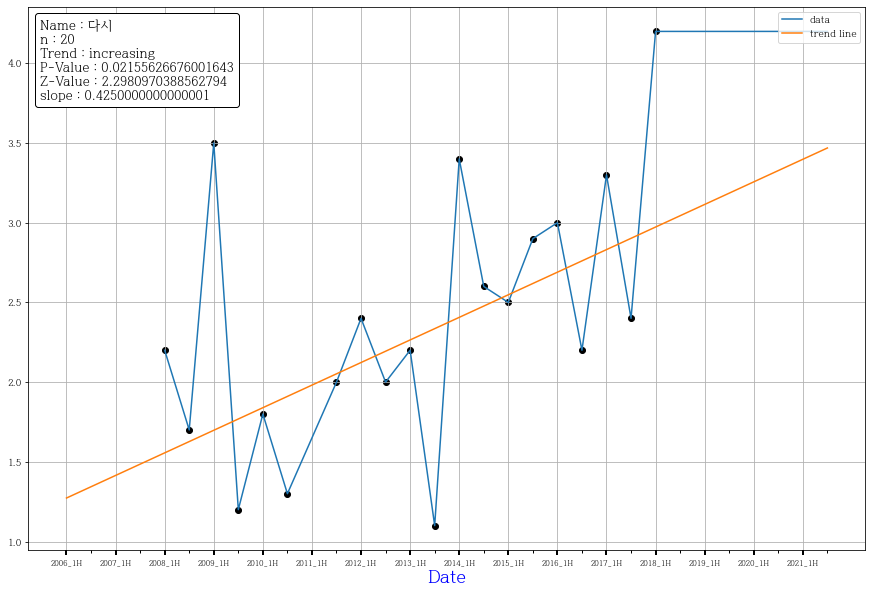

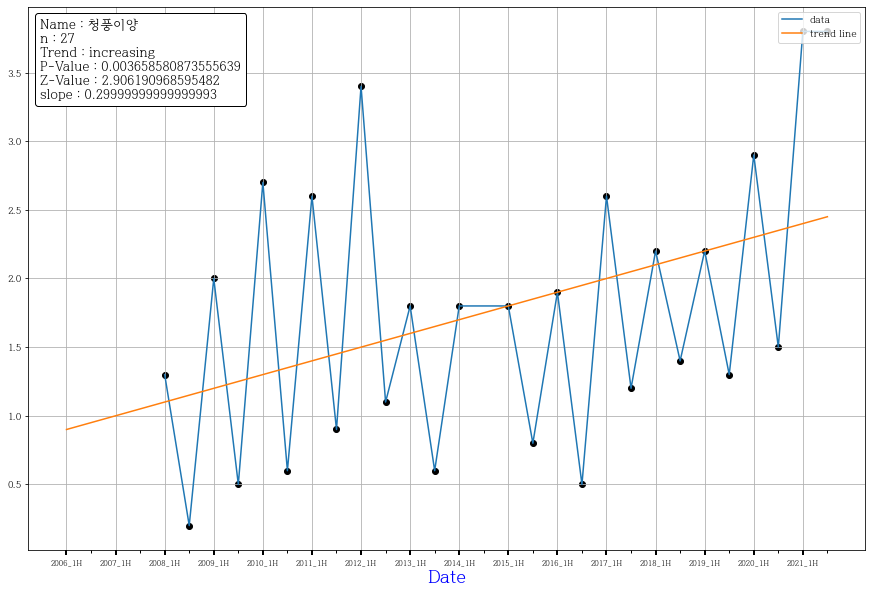

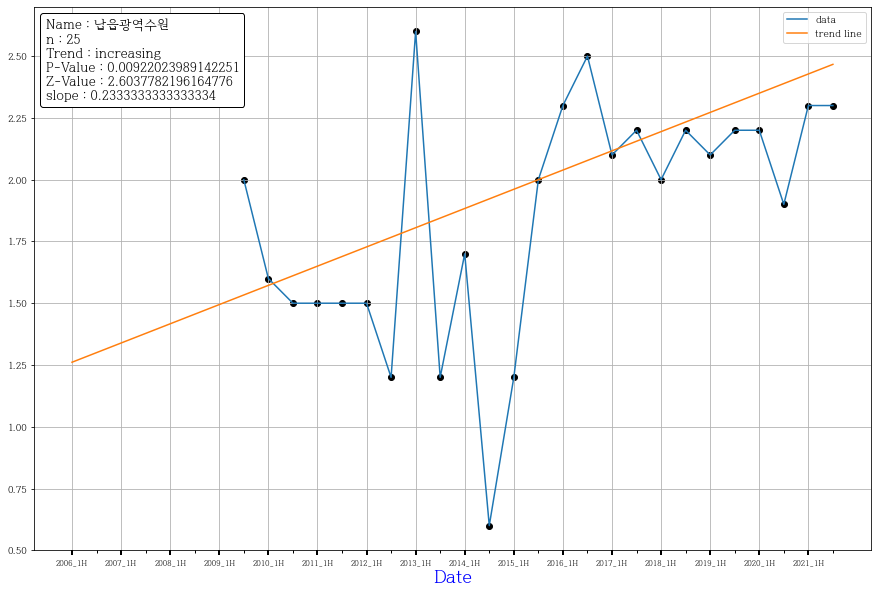

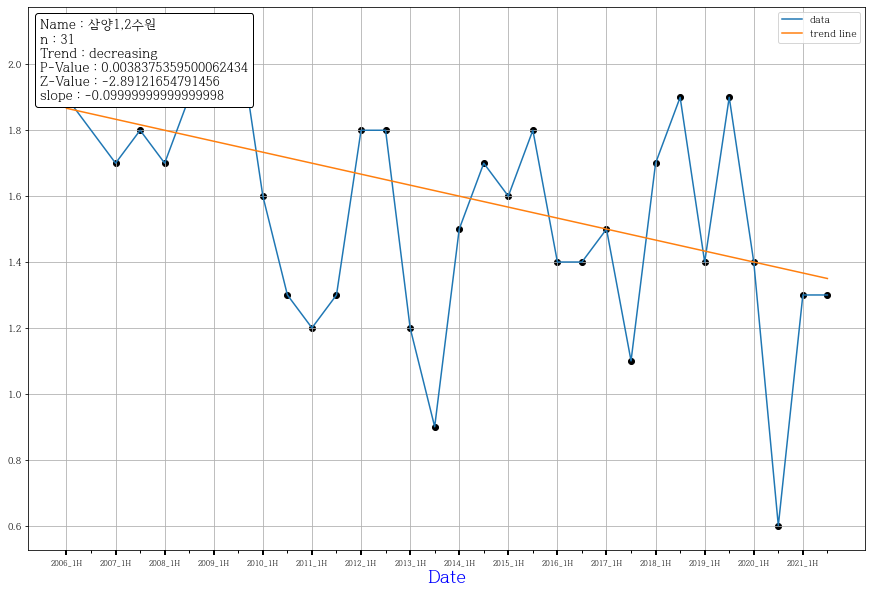

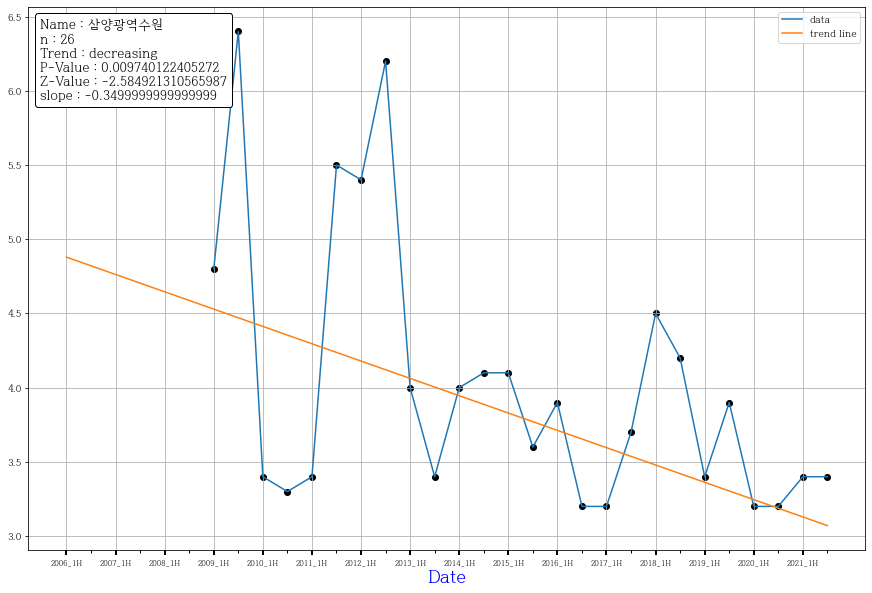

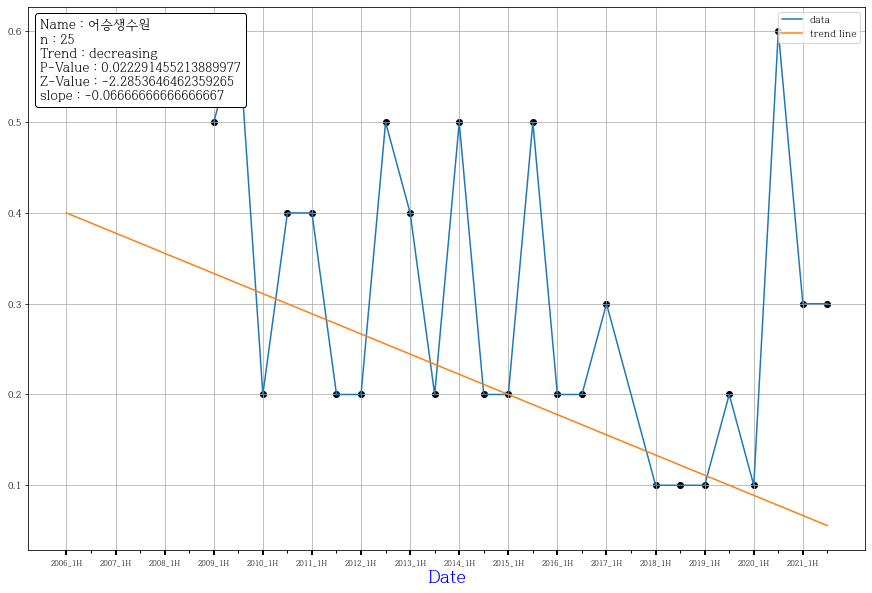

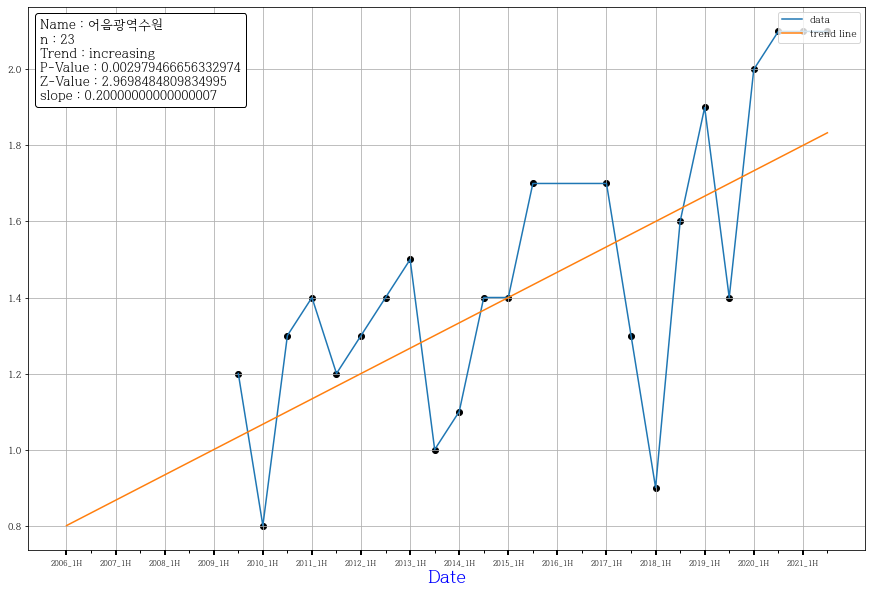

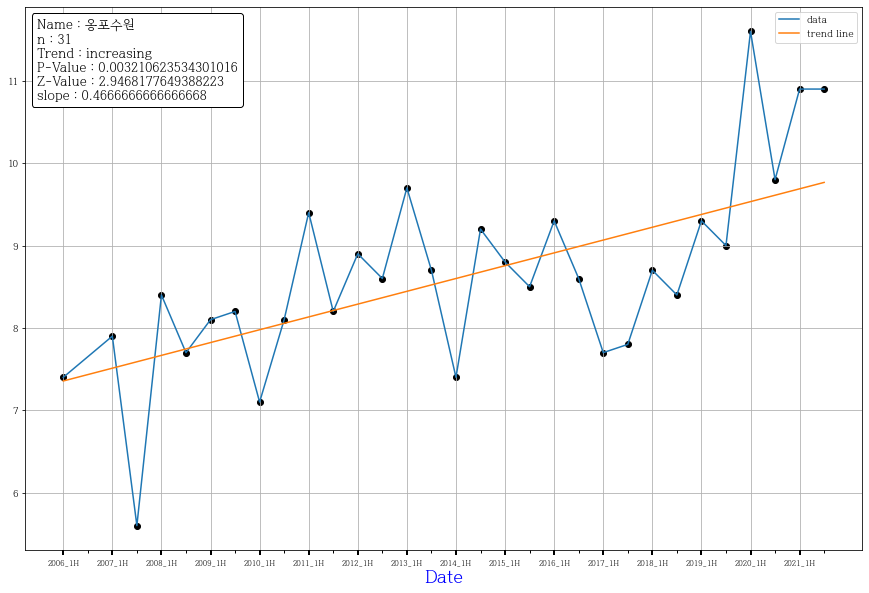

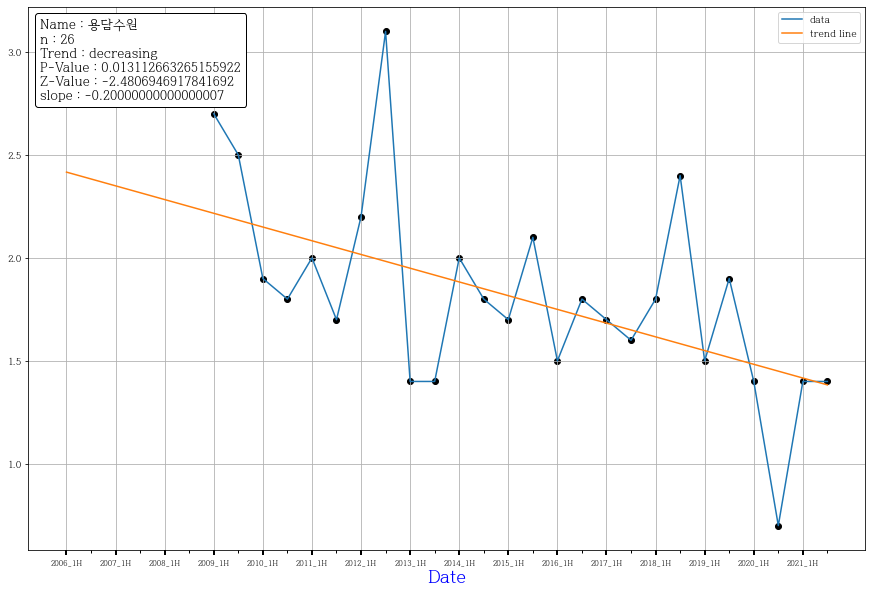

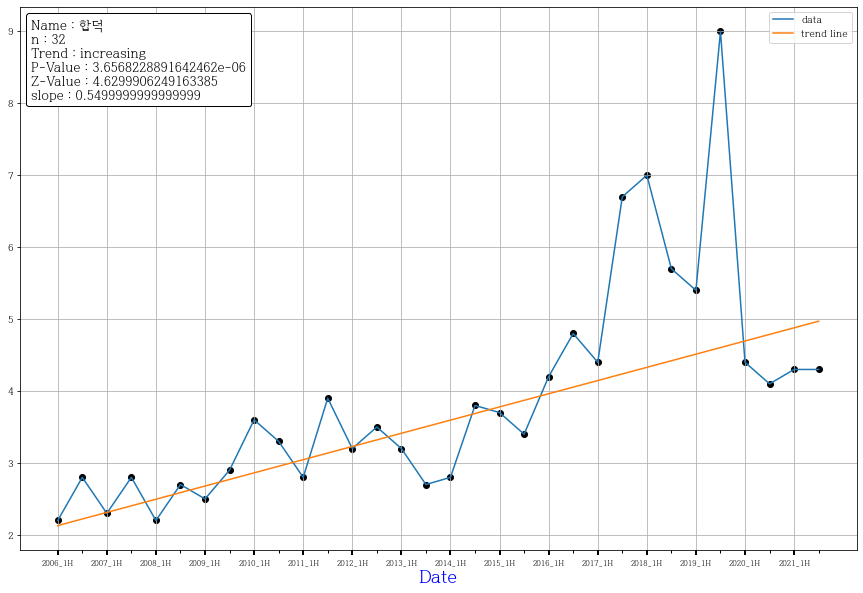

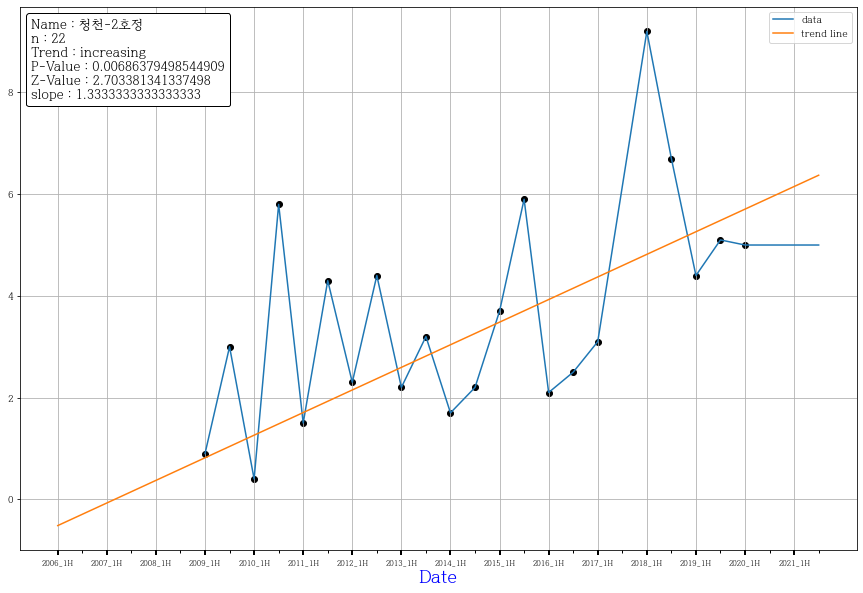

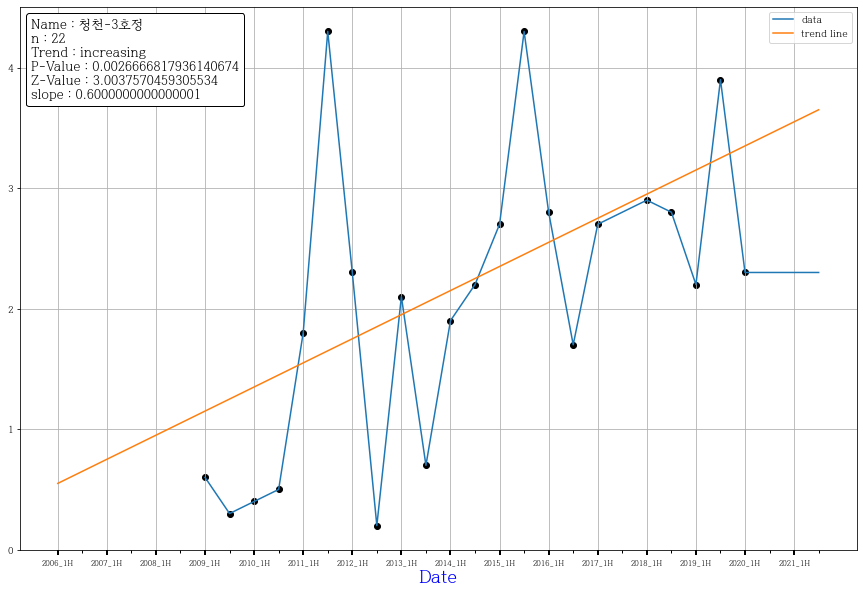

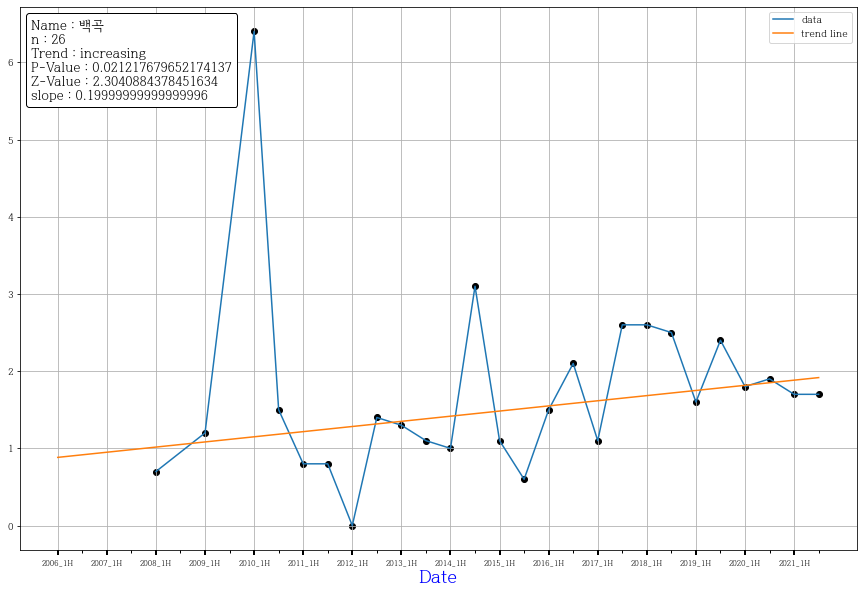

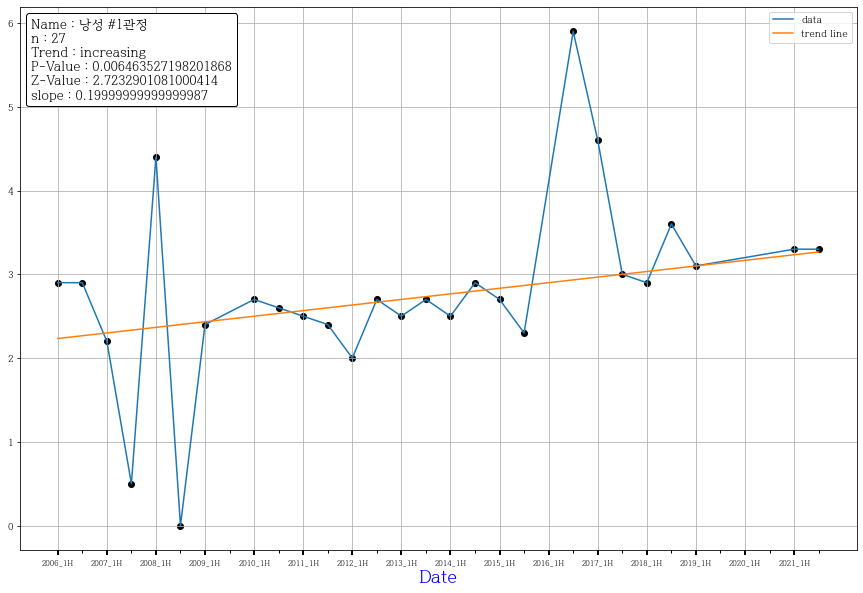

In [4]:
# 데이터 축적시킬 데이터프레임 생성 및 초기화
total_data = pd.DataFrame({'관정명' : [None],
                    'Trend' : [None],
                    'Test P' : [None],
                    'Test Z' : [None],
                    'Slope' : [None]})

#반복문 시행 -> 분석데이터 자료 축적 or 그래프 추출
##파일 양식만 맞으면 수정해서 사용가능

period = 6 # 반기주기 = 6,월별주기 = 12, 분기주기 = 3, 주별주기 = 52
for i in range(0, len(df.columns)):
    #데이터 분석
    df_filter = df.iloc[:, i]
    df_filter_null = df_filter.interpolate() # 결측값 보간하기
    N_value = df_filter.count()
    try : 
        res = mk.seasonal_test(df_filter, period = period)
        #데이터 축적
        addtive_data = pd.DataFrame({'관정명' : [df_filter.name],
                    'Trend' : [res.trend],
                    'Test P' : [res.p],
                    'Test Z' : [res.z],
                    'Slope' : [res.slope]})
        total_data = total_data.append(addtive_data, ignore_index = True)
    except ZeroDivisionError :
        print("Division by zero, please check the data before apply seasonal_test function \n Error Data Name : %s"%(df_filter.name))
        error_data = pd.DataFrame({'관정명' : [df_filter.name], 'Error': ['ZeroDivisionError']})
        total_data = pd.concat([total_data, error_data], ignore_index=True)
        
    #시각화 작업
    ## if문으로 분석된 res값의 h값이 True => 그래프 생성, res값의 h값이 False => 다음 행으로 넘어감
    if res.h == True :
        fig, ax = plt.subplots(figsize = (15,10)) #그래프 크기
        
       #Seasonal Mannkendall Test
        trend_line = np.arange(len(df_filter)) / period * res.slope + res.intercept
        
        # 그래프내의 데이터 설명
        at = AnchoredText(
        "Name : %s \nn : %d\nTrend : %s\nP-Value : %s\nZ-Value : %s\nslope : %s"%(df_filter.name,N_value,res.trend,res.p,res.z,res.slope), 
        prop=dict(size=13), loc='upper left')
        at.patch.set_boxstyle("round,pad=0., rounding_size = 0.2")
        ax.add_artist(at)
        
        #그래프 눈금(Ticks)처리
        major_xticks = [i for i in range(0, len(df_filter.index), 2)] #Main Ticks
        minor_xticks = [i for i in range(0, len(df_filter.index))] #sub ticks
        ax.set_xticks(major_xticks)
        ax.set_xticks(minor_xticks, minor=True) 
        
       #눈금 속성 처리
        ax.tick_params(axis='x',
                      labelsize = 8,
                      length = 5,
                      width = 2)
                      #rotation=30 => 글씨 회전
        ax.tick_params(axis='x',
                      which = 'minor',
                      length=3,
                      width=1
                      )
        #그래프 시각화
        ax.grid()
        ax.scatter(df_filter.index, df_filter, color = 'black')
        ax.plot(df_filter_null)
        ax.plot(df_filter.index, trend_line)
        ax.set_xlabel('Date', fontsize=18, color = 'blue')
        ax.legend(['data', 'trend line'], loc='upper right')
        fig.savefig('[seasonal]%s.png'%(df_filter.name), dpi=150, facecolor='#eeeeee', bbox_inches='tight')
        
#분석 데이터 csv파일로 저장
total_data=total_data.drop(0) # 데이터프레임 생성시 만들어놓은 첫번째행 제거
total_data.to_csv('%s/[seasonal]추세분석 결과.csv'%(os.getcwd()),
                 encoding = 'euc-kr')